<a href="https://colab.research.google.com/github/Habibu-Ahmad/Modelling_Ribosome_Motion/blob/main/TASEP/Density_profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

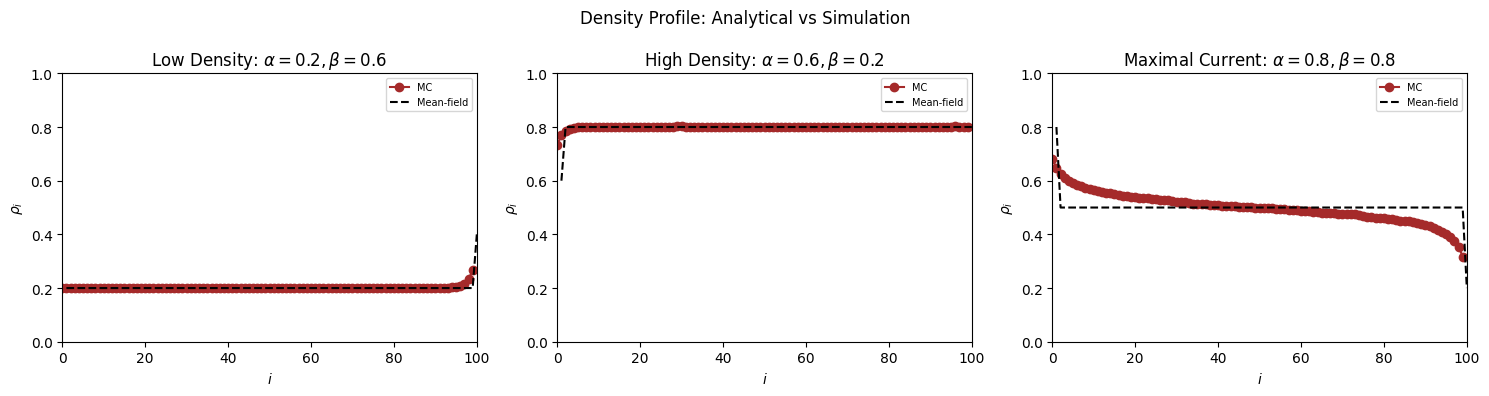

In [12]:
##Tasep Density Profile Comparison Between Simulation and Analytical result

import matplotlib.pyplot as plt
import numpy as np

def step(site, alpha, beta):
    L = len(site)
    i = np.random.choice(L)
    if i == 0:
        if site[i] == 0 and np.random.random() <= alpha:
            site[i] = 1
        elif site[i] == 1 and site[i + 1] == 0:
            site[i] = 0
            site[i + 1] = 1
    elif i == L-1:
        if np.random.random() <= beta:
            site[L-1] = 0
    else:
        if site[i] == 1 and site[i + 1] == 0:
            site[i] = 0
            site[i + 1] = 1
    return site

def run_mc(L, alpha, beta, Nmax, Ninit):
    site = np.zeros(L, dtype="int")
    n = 0
    rho = np.zeros(L)
    rhocnt = 0
    while n < Nmax:
        site = step(site, alpha, beta)
        if n > Ninit:
            rho = rho + site
            rhocnt += 1
        n += 1
    return rho / rhocnt

def calculate_density_profile(L, alpha, beta):
    sites = list(range(1, L + 1))
    density_profile = []

    for x in sites:
        # Calculate the bulk density
        if alpha < min(beta, 0.5):
            bulk_density = alpha
        elif beta < min(alpha, 0.5):
            bulk_density = 1 - beta
        else:
            bulk_density = 0.5

        # Calculate the density profile based on left and right boundary conditions
        if x == 1:
            density_profile.append(alpha)  # Left boundary
        elif x == L:
            density_profile.append(1 - beta)  # Right boundary
        else:
            density_profile.append(bulk_density)  # Bulk density

    return sites, density_profile
# Set common parameters
L = 100
Nmax = 1000000 * L
Ninit = 50000 * L

## Define different values of alpha and beta for HD, LD, and MC
parameters = [
    (0.2, 0.6, 'Low Density'),
    (0.6, 0.2, 'High Density'),
    (0.8, 0.8, 'Maximal Current')
]

# Create subplots for the three density profiles
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

for ax, (alpha, beta, label) in zip(axes, parameters):
    # Monte Carlo simulation
    rho_mc = run_mc(L, alpha, beta, Nmax, Ninit)
    ax.plot(range(L), rho_mc, label='MC', color='brown', marker='o')

    # Mean-field simulation
    sites, density_profile = calculate_density_profile(L, alpha, beta)
    ax.plot(sites, density_profile, linestyle='--', linewidth=1.5, color='black', label='Mean-field')

    # Plot settings
    ax.set_xlabel(r'$i$')
    ax.set_ylabel(r'$\rho_i$')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 100)
    ax.legend()
    ax.set_title(f'{label}: ' r'$\alpha = {0}, \beta = {1}$'.format(alpha, beta))
    ax.legend(fontsize= 7)
plt.suptitle('Density Profile: Analytical vs Simulation')
plt.tight_layout()
plt.show()